In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import os.path

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_all-time_NFL_win%E2%80%93loss_records"
page = urlopen(url)
soup = BeautifulSoup(page.read(), 'lxml')
my_tables = soup.find_all('table', {'class': 'wikitable sortable'})  

In [3]:
rank = []
team = []
gp = []
won = []
lost = []
pct = []
last_playoff = []
division = []

In [4]:
right_table = my_tables[1]
for row in right_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) == 8:
        rank.append(cells[0].find(text=True).strip("\n"))
        team.append(cells[1].find(text=True).strip("\n"))
        gp.append(cells[2].find(text=True).strip("\n"))
        won.append(cells[3].find(text=True).strip("\n"))
        lost.append(cells[4].find(text=True).strip("\n"))
        pct.append(cells[5].find(text=True).strip("\n"))
        last_playoff.append(cells[6].find(text=True).strip("\n"))
        division.append(cells[7].find(text=True).strip("\n"))

In [5]:
df = pd.DataFrame(rank, columns=['rank'])
df['team'] = team
df['gp'] = gp
df['Won'] = won
df['Lost'] = lost
df['Pct.'] = pct
df['Last playoff'] = last_playoff
df['Division'] = division
print(df)

   rank                   team  gp Won Lost  Pct. Last playoff   Division
0     1   New England Patriots  59  37   22  .627         2021   AFC East
1     2    San Francisco 49ers  59  36   23  .610         2022   NFC West
2     3      Green Bay Packers  61  36   25  .590         2021  NFC North
3     4       Baltimore Ravens  28  16   12  .571         2022  AFC North
4     6      Las Vegas Raiders  45  25   20  .556         2021   AFC West
5     7         Denver Broncos  42  23   19  .548         2015   AFC West
6     8         Dallas Cowboys  66  36   30  .545         2022   NFC East
7     9  Washington Commanders  43  23   20  .535         2020   NFC East
8    10      Carolina Panthers  17   9    8  .529         2017  NFC South
9    11    Philadelphia Eagles  50  25   25  .500         2022   NFC East
10   14       Los Angeles Rams  53  26   27  .491         2021   NFC West
11   15        New York Giants  51  25   26  .490         2022   NFC East
12   16     Kansas City Chiefs  41  20

In [6]:
df.to_csv('webscrape_data.csv', encoding='utf-8', index=False)
path = './webscrape_data.csv'
if os.path.exists(path):
    print('File webscrape_data.csv created')

File webscrape_data.csv created


In [7]:
import os # provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

cols = ['rank','team','gp','Won','Lost','Pct.','Last playoff', 'Division']
DF_NFL = pd.read_csv('webscrape_data.csv', names = cols)
DF_NFL = DF_NFL.iloc[1:]
DF_NFL.head(11)

,rank,team,gp,Won,Lost,Pct.,Last playoff,Division
1,1,New England Patriots,59,37,22,.627,2021,AFC East
2,2,San Francisco 49ers,59,36,23,.610,2022,NFC West
3,3,Green Bay Packers,61,36,25,.590,2021,NFC North
4,4,Baltimore Ravens,28,16,12,.571,2022,AFC North
5,6,Las Vegas Raiders,45,25,20,.556,2021,AFC West
6,7,Denver Broncos,42,23,19,.548,2015,AFC West
7,8,Dallas Cowboys,66,36,30,.545,2022,NFC East
8,9,Washington Commanders,43,23,20,.535,2020,NFC East
9,10,Carolina Panthers,17,9,8,.529,2017,NFC South
10,11,Philadelphia Eagles,50,25,25,.500,2022,NFC East


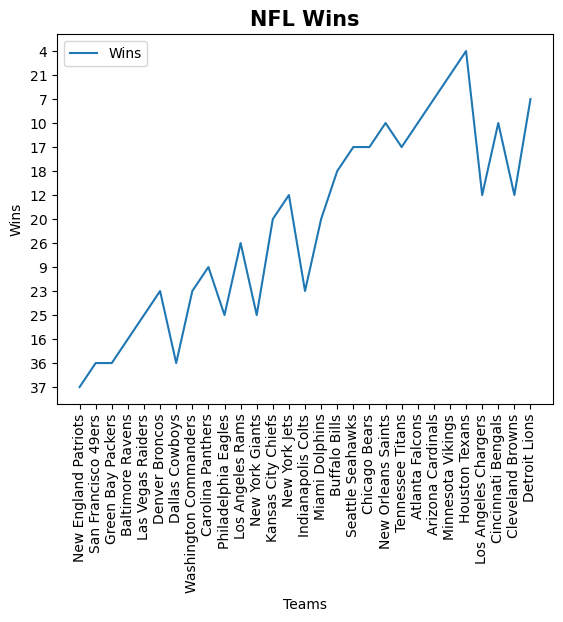

In [8]:
# INSERT CODE FOR STEPS 1 - 10
Wins = np.array(DF_NFL['Won'])

plt.title("NFL Wins",fontsize=15, fontweight='bold')

plt.xlabel('Teams')

plt.ylabel("Wins")

plt.xticks(ticks=range(len(Wins)), labels=DF_NFL['team'], rotation=90)

plt.plot(DF_NFL['team'], DF_NFL['Won'], label = 'Wins')


plt.legend()


plt.show()

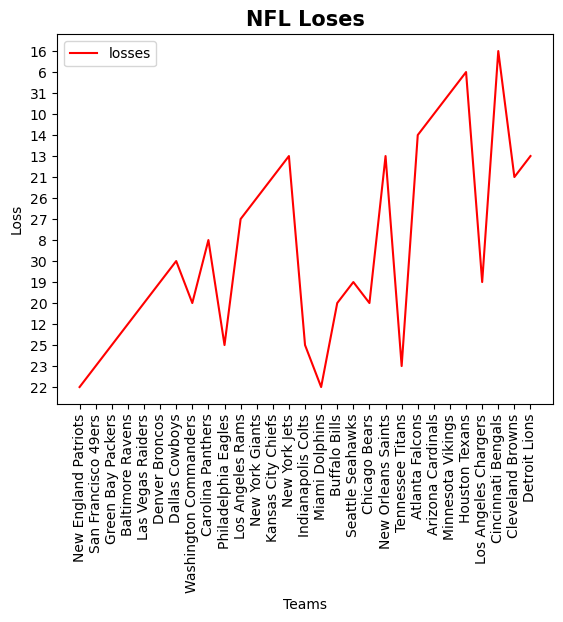

In [9]:
Wins = np.array(DF_NFL['Lost'])

plt.title("NFL Loses",fontsize=15, fontweight='bold')

plt.xlabel('Teams')

plt.ylabel("Loss")

plt.xticks(ticks=range(len(Wins)), labels=DF_NFL['team'], rotation=90)

plt.plot(DF_NFL['team'], DF_NFL['Lost'], label = 'losses', color='red')



plt.legend()